# Homework 4 
Li donghao 
20653877
## problem 1
In this problem I explore the data using MDS and random projection. Since the dimension is quite large, random projection could accerlate the process significantly. Also, the first two dimension of MDS is quite similiar. That means random projection is suitable for high dimensional data analysis.


In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import cvxpy as cp
import seaborn as sns

In [2]:
df=pd.read_csv("ceph_hgdp_minor_code_XNA.betterAnnotated.csv")
df_info=pd.read_csv("ceph_hgdp_minor_code_XNA.sampleInformation.csv")
labels=df_info["Geographic.area"]
X=df.to_numpy()
X=X[:,3:].astype(float).transpose()        

In [3]:
H=np.eye(X.shape[0]) -(1/X.shape[0])*np.ones((X.shape[0],1)).dot(np.ones((1,X.shape[0])))

In [4]:
K=H.dot(X).dot(X.transpose()).dot(H.transpose())

In [5]:
eigen_values,eigen_vec=np.linalg.eig(K)

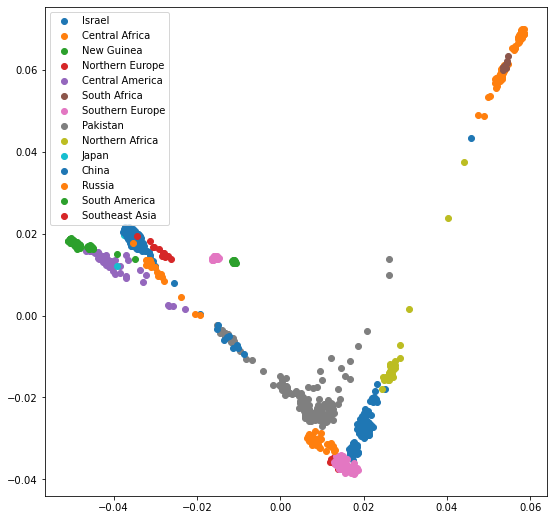

In [6]:
labels=df_info["Geographic.area"]
labels=labels.to_numpy()
plt.figure(figsize=(9,9))
for label in set(list(labels)):
    index=labels==label
    plt.scatter(eigen_vec[index,0],eigen_vec[index,1],label=label)
plt.legend()
plt.show()

In [8]:
k=5000
n_k=np.random.choice(X.shape[1],k,replace=False)
R=np.eye(X.shape[1])[n_k]/k

In [9]:
K_rp=H.dot( X.dot(R.transpose() )).dot( R.dot(X.transpose()) ).dot(H.transpose())

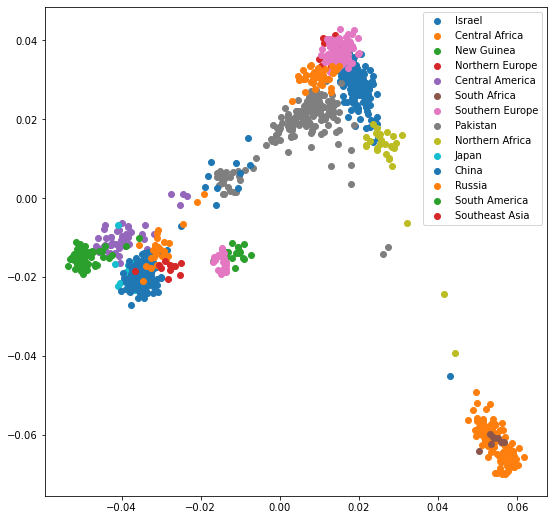

In [10]:
eigen_values_rp,eigen_vec_rp=np.linalg.eig(K_rp)
labels=df_info["Geographic.area"]
labels=labels.to_numpy()
plt.figure(figsize=(9,9))
for label in set(list(labels)):
    index=labels==label
    plt.scatter(eigen_vec_rp[index,0],eigen_vec_rp[index,1],label=label)
plt.legend()
plt.show()


## Problem 2

In [18]:
d=20
repeat_time=50
res_mat=np.zeros((20,20))
for n in range(1,20,1):
    for k in range(1,20,1):
        count=0
        for repeat in range(repeat_time):
            x_0=np.zeros((d))
            nonzero_index=np.random.choice(d,k,replace=False)
            for i in nonzero_index:
                x_0[i]=np.random.binomial(1,0.5)*2-1
            A=np.random.normal(size=(n,d))
            b=A@x_0
            x = cp.Variable(d)
            objective = cp.Minimize( cp.sum(cp.abs(x))  )
            constraints = [ A@x==b ,]
            prob = cp.Problem(objective, constraints)
            result = prob.solve()
            if np.linalg.norm(x.value-x_0)<1e-3:
                count+=1
        res_mat[n,k]=count/float(repeat_time)
            # print( np.linalg.norm(x.value-x_0) )


Text(60.0, 0.5, 'N')

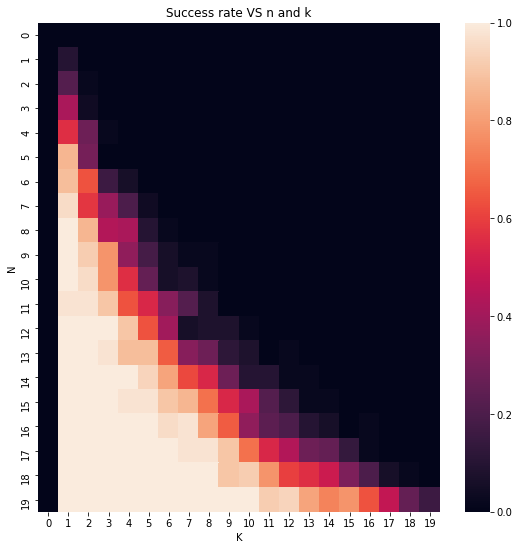

In [19]:
plt.figure(figsize=(9,9))
ax = sns.heatmap(res_mat)
plt.title("Success rate VS n and k")
plt.xlabel("K")
plt.ylabel('N')

We can see from the graph that the lower left part is bright and upper right is dark. That means if we fix K, when N increase, the success rate increase. While when we fix N, when K is smaller, the success rate is higher.

In Tropp's paper, there is a similiar figure (Figure 1.1). This indecate our experiments is correct.

Living on the edge: Phase transitions in convex programs with random data(https://arxiv.org/abs/1303.6672)